Text(0.5, 1.0, 'Pass vs Fail for All SF Fiscal Ballot Props Since 2010')

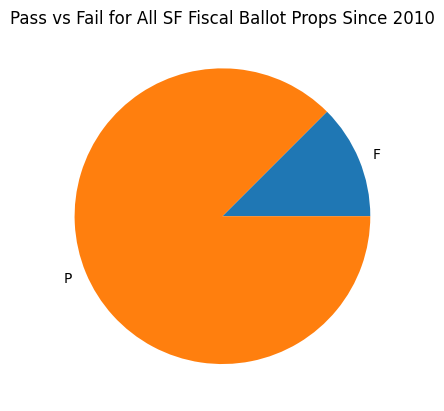

In [8]:
#@title --
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Ballot.csv')
df= df[df.Fiscal=='X']
df['total_votes'] =df.Yes + df.No
# df.groupby('Year').total_votes.mean().plot(kind='bar')
# plt.title('Total Votes for SF Fiscal Ballot Props Over Time')
df['PassFail']=df.PassFail.str.upper()
df.groupby('PassFail').Subject.count()
df.groupby('PassFail').Subject.count().plot.pie(ylabel='')
plt.title('Pass vs Fail for All SF Fiscal Ballot Props Since 2010') # ~90% pass rate!

Text(0.5, 1.0, 'Passed vs Failed SF Fiscal Ballot Props Over Time')

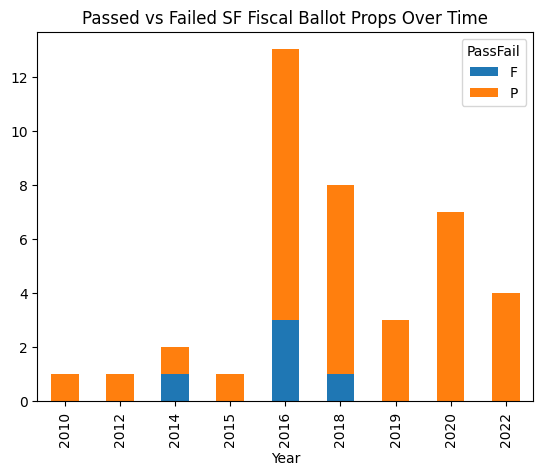

In [9]:
#@title --
df.groupby(['Year', 'PassFail']).Percent.count().unstack().plot(stacked=True, kind='bar')
plt.title('Passed vs Failed SF Fiscal Ballot Props Over Time') #it has always been the case for almost 100% pass rate

Text(0.5, 1.0, 'Average Yes Percent for Passed Fiscal Ballot Props')

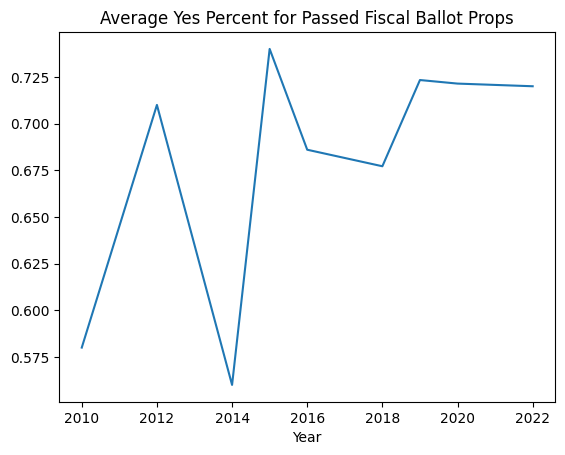

In [10]:
#@title --
# df.groupby('Year').Percent.mean().plot()
# plt.title('Average Yes Percent for All Fiscal Ballots')
df[(df['PassFail']=='P')].groupby('Year').Percent.mean().plot()
plt.title('Average Yes Percent for Passed Fiscal Ballot Props') #70%+ voted yes for passed ballots

<ipython-input-11-2fd87106a4b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['PassFail']=='P')].groupby('Year')['Yes', 'No'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Yes vs No Votes for Passed SF Fiscal Ballot Props')

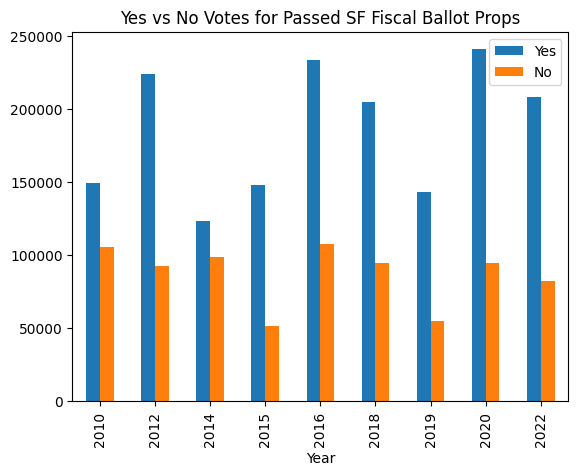

In [11]:
#@title --
df[(df['PassFail']=='P')].groupby('Year')['Yes', 'No'].mean().plot(kind='bar')
plt.title('Yes vs No Votes for Passed SF Fiscal Ballot Props')

<ipython-input-12-de394ad44b5c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['PassFail']=='P')].groupby('Subject')['No', 'Yes'].mean().sort_values(by='Yes').plot(kind='bar', figsize=(18, 10))


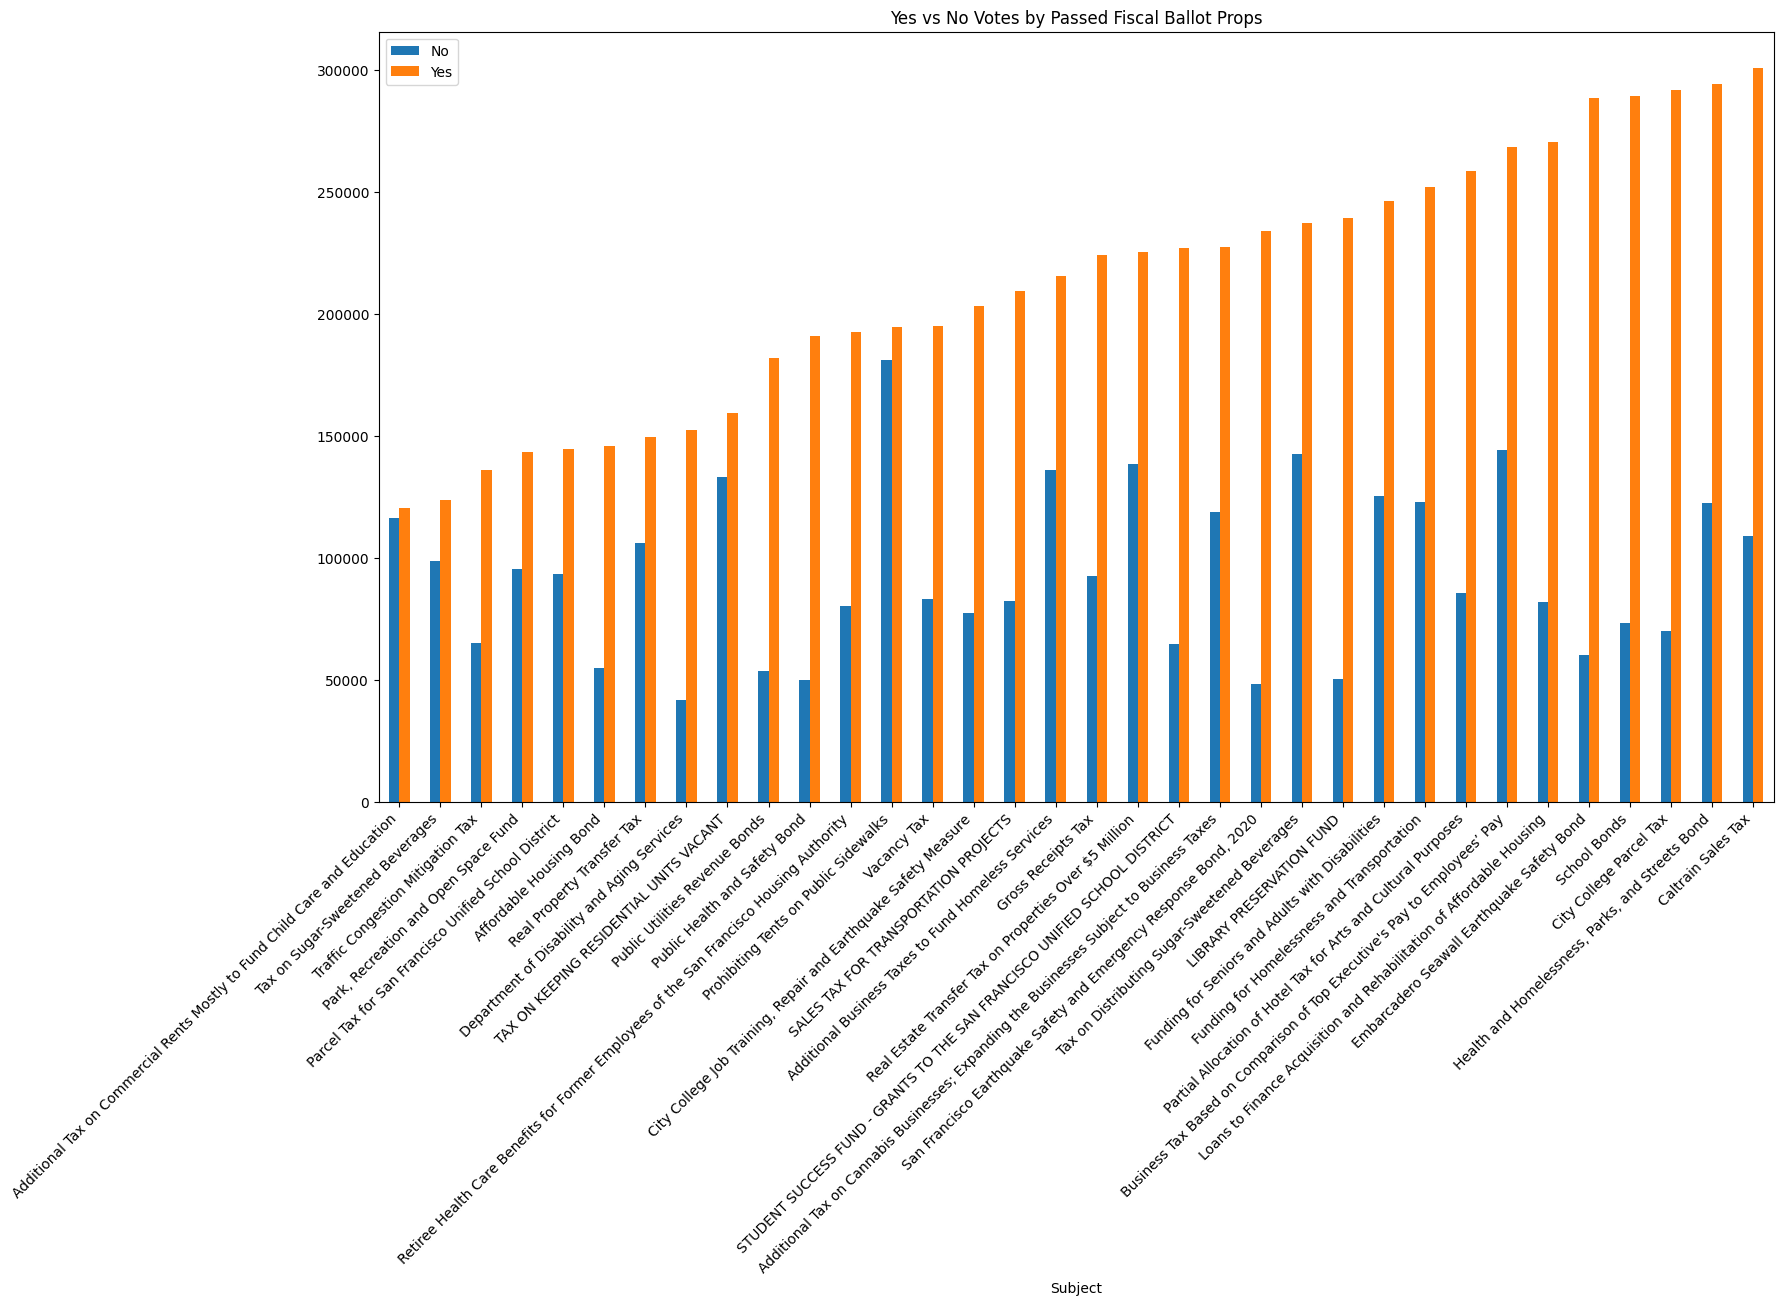

In [12]:
#@title --
df[(df['PassFail']=='P')].groupby('Subject')['No', 'Yes'].mean().sort_values(by='Yes').plot(kind='bar', figsize=(18, 10))
plt.title('Yes vs No Votes by Passed Fiscal Ballot Props')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

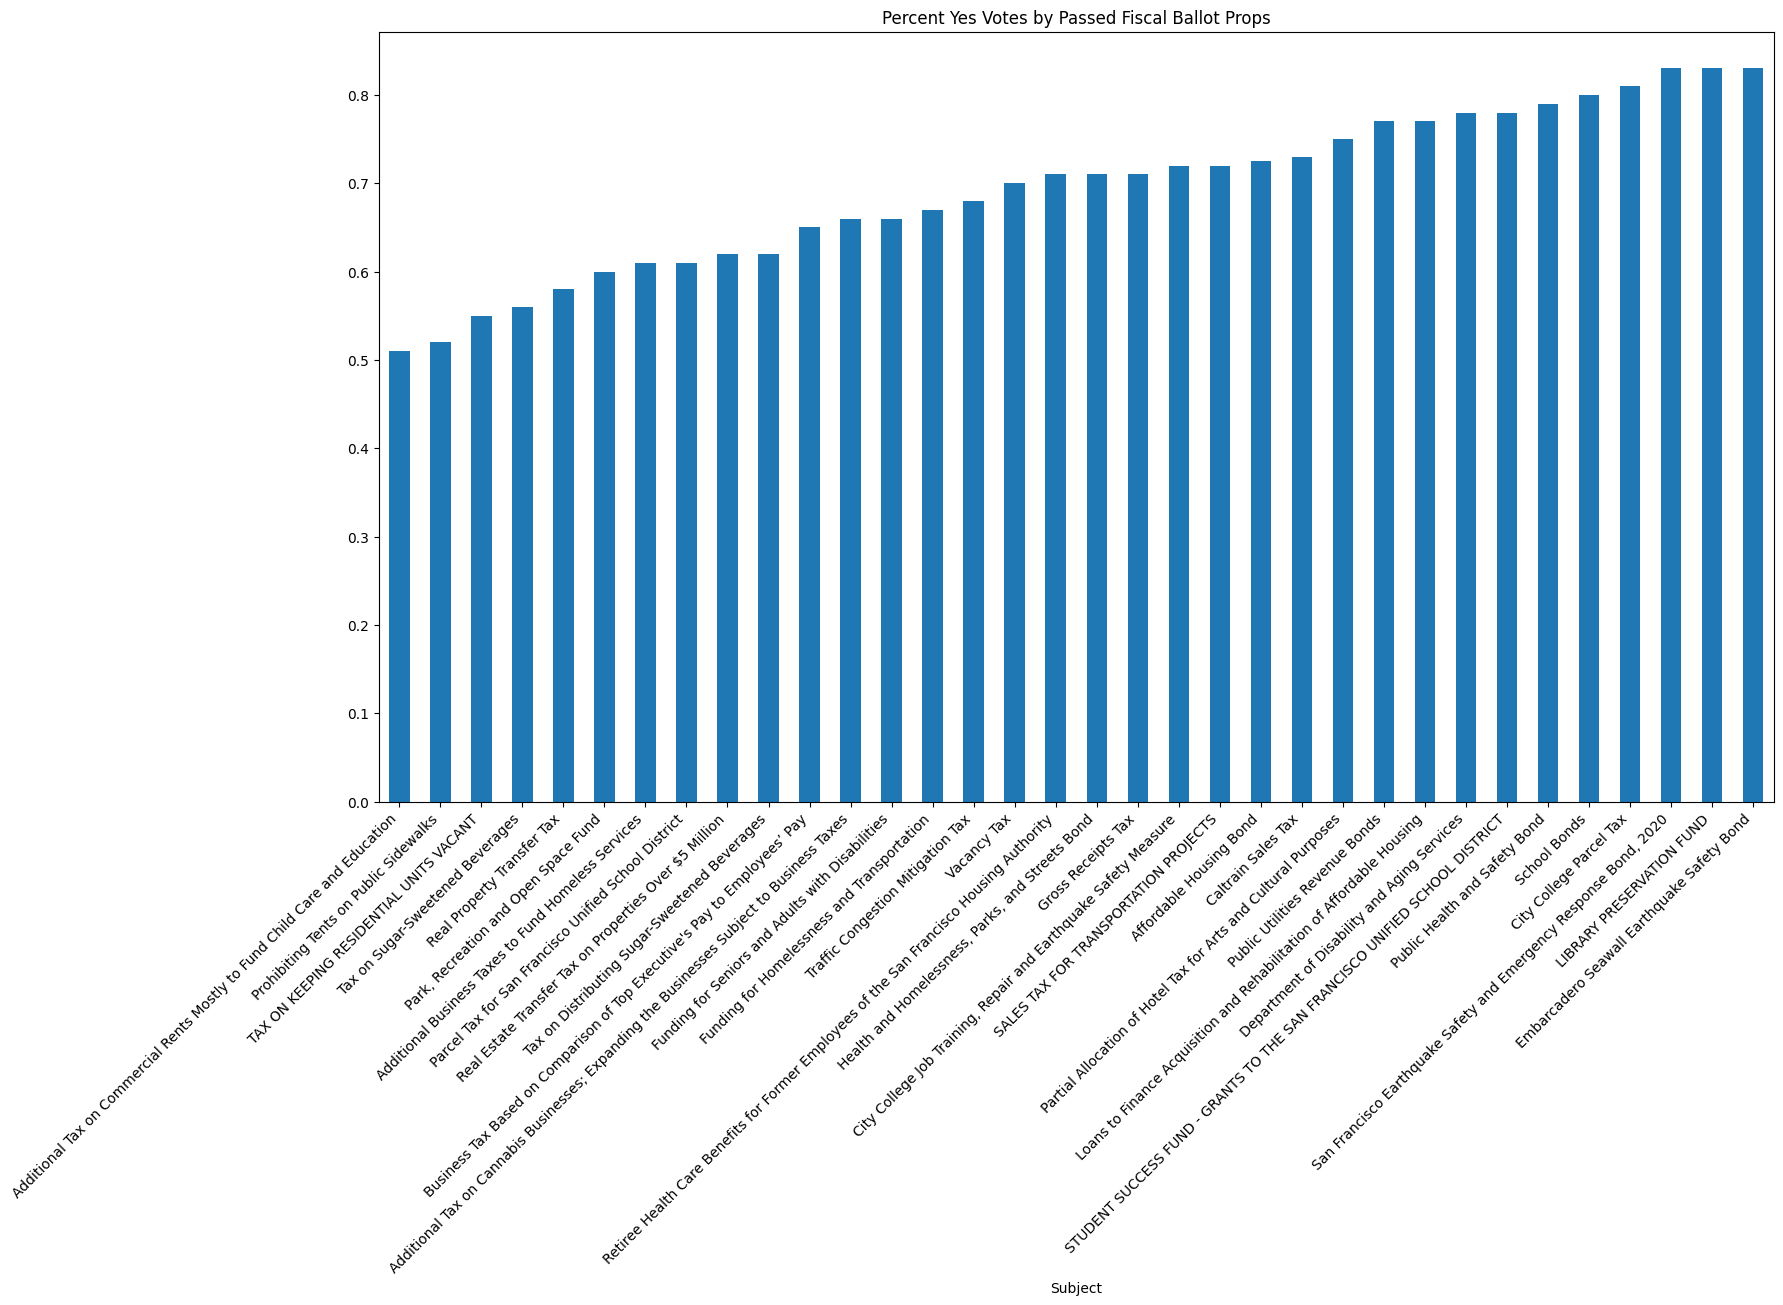

In [13]:
#@title --
df[(df['PassFail']=='P')].groupby('Subject').Percent.mean().sort_values().plot(kind='bar', figsize=(18, 10))
plt.title('Percent Yes Votes by Passed Fiscal Ballot Props')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

Text(0.5, 1.0, 'Passed SF Fiscal Ballot Props by Type of Legistration')

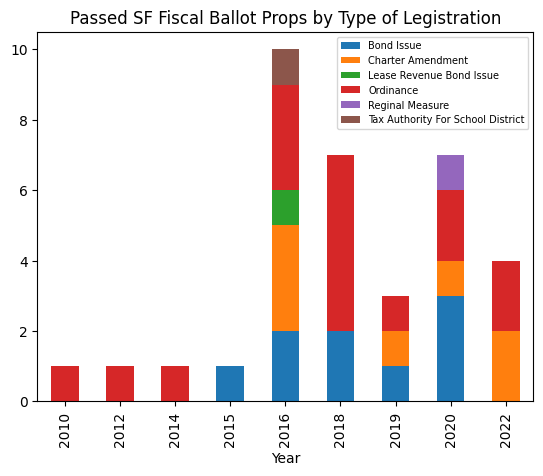

In [ ]:
#@title --
def typemeasure(t):
  if t=='B':
    return 'Bond Issue'
  elif t=='C':
    return 'Charter Amendment'
  elif t=='L':
    return 'Lease Revenue Bond Issue'
  elif t=='O':
    return 'Ordinance'
  elif t=='P':
    return 'Policy Declaration'
  elif t=='R':
    return 'Recall'
  elif t=='RM':
    return 'Reginal Measure'
  elif t=='T':
    return 'Tax Authority For School District'
  else:
    return t

df['TypeMeas_full']=df.TypeMeas.apply(lambda x: typemeasure(x))

df[df.PassFail=='P'].groupby(['Year', 'TypeMeas_full']).Percent.count().unstack().plot(stacked=True, kind='bar').legend(loc='best', fontsize=7)
plt.title('Passed SF Fiscal Ballot Props by Type of Legistration')


#B='Bond Issue', C='Charter Amendment', L='Lease Revenue Bond Issue',
#O='Ordinance', P='Policy Declaration', R='Recall', RM='Reginal Measure', T='Tax Authority For School District'

In [ ]:
#@title --
# df[df.PassFail=='F'].groupby(['Year', 'TypeMeas']).Percent.count().unstack().plot(stacked=True, kind='bar')
# plt.title('Failed SF Fiscal Ballot Props by Type of Legistration')

# B='Bond Issue', C='Charter Amendment', L='Lease Revenue Bond Issue',
# O='Ordinance', P='Policy Declaration', R='Recall', RM='Reginal Measure', T='Tax Authority For School District'
def ballotmethod(m):
  if m=='C':
    return 'Charter Commission/Elected Voters'
  elif m=='I':
    return 'Initial Petition'
  elif m=='L':
    return 'Labor Dispute'
  elif m=='S':
    return 'The Board of Supervisors'
  elif m=='s':
    return 'Four+ Supervisors'
  elif m=='2':
    return 'By Two Methods'
  elif m=='se':
    return 'Special (board of education etc)'
  else:
    return m

df['By_full']=df.By.apply(lambda x: ballotmethod(x))

Text(0.5, 1.0, 'Passed SF Fiscal Ballot Props by Method of Placement')

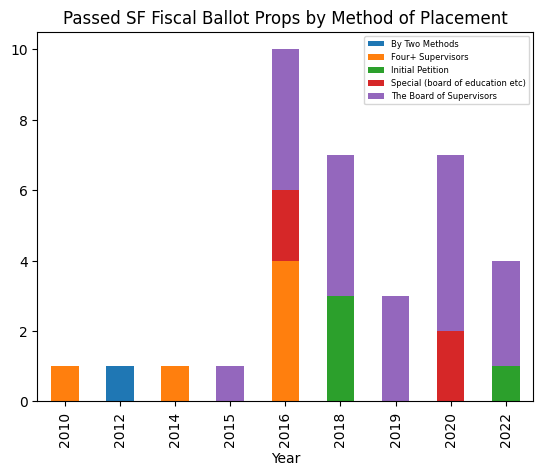

In [ ]:
#@title --
df[df.PassFail=='P'].groupby(['Year', 'By_full']).Percent.count().unstack().plot(stacked=True, kind='bar').legend(loc='best', fontsize=6)
plt.title('Passed SF Fiscal Ballot Props by Method of Placement')

# C = Charter commission, elected voters, I= Initial Petition, L=Labor Dispute, S=The Board of Supervisors, M= Mayor
# s=Four or more individual supervisors, se= Special (board of education etc), 2= by two of the above methods

## most of ballot props are placed by board of supervisors

Text(0.5, 1.0, 'Passed Ballot Prop Since 2010 by Type & Method')

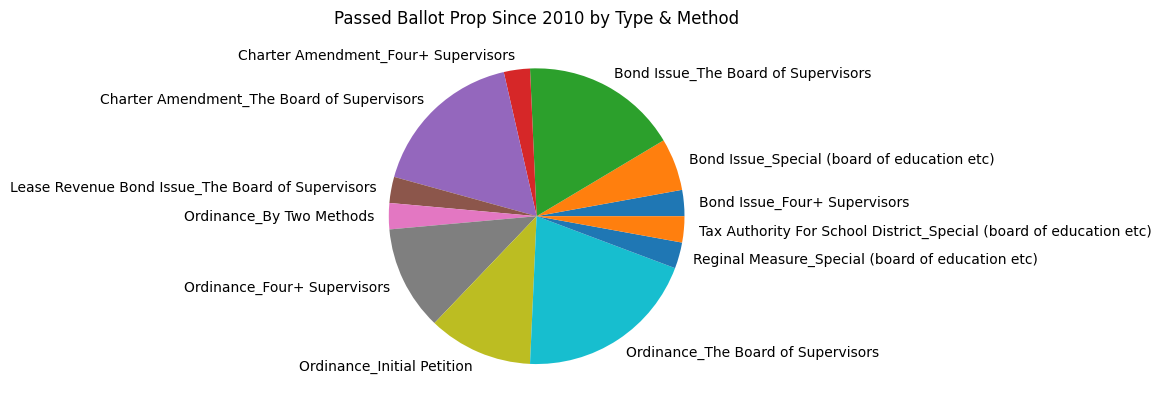

In [ ]:
#@title --
df['Concate_Type_Method']=df.TypeMeas_full+'_' + df.By_full
df[(df['PassFail']=='P')].groupby('Concate_Type_Method').Subject.count().plot.pie(ylabel='')
plt.title('Passed Ballot Prop Since 2010 by Type & Method')

Text(0.5, 1.0, 'Passed Ballot Props Since 2010 Placed by The Board of Supervisors')

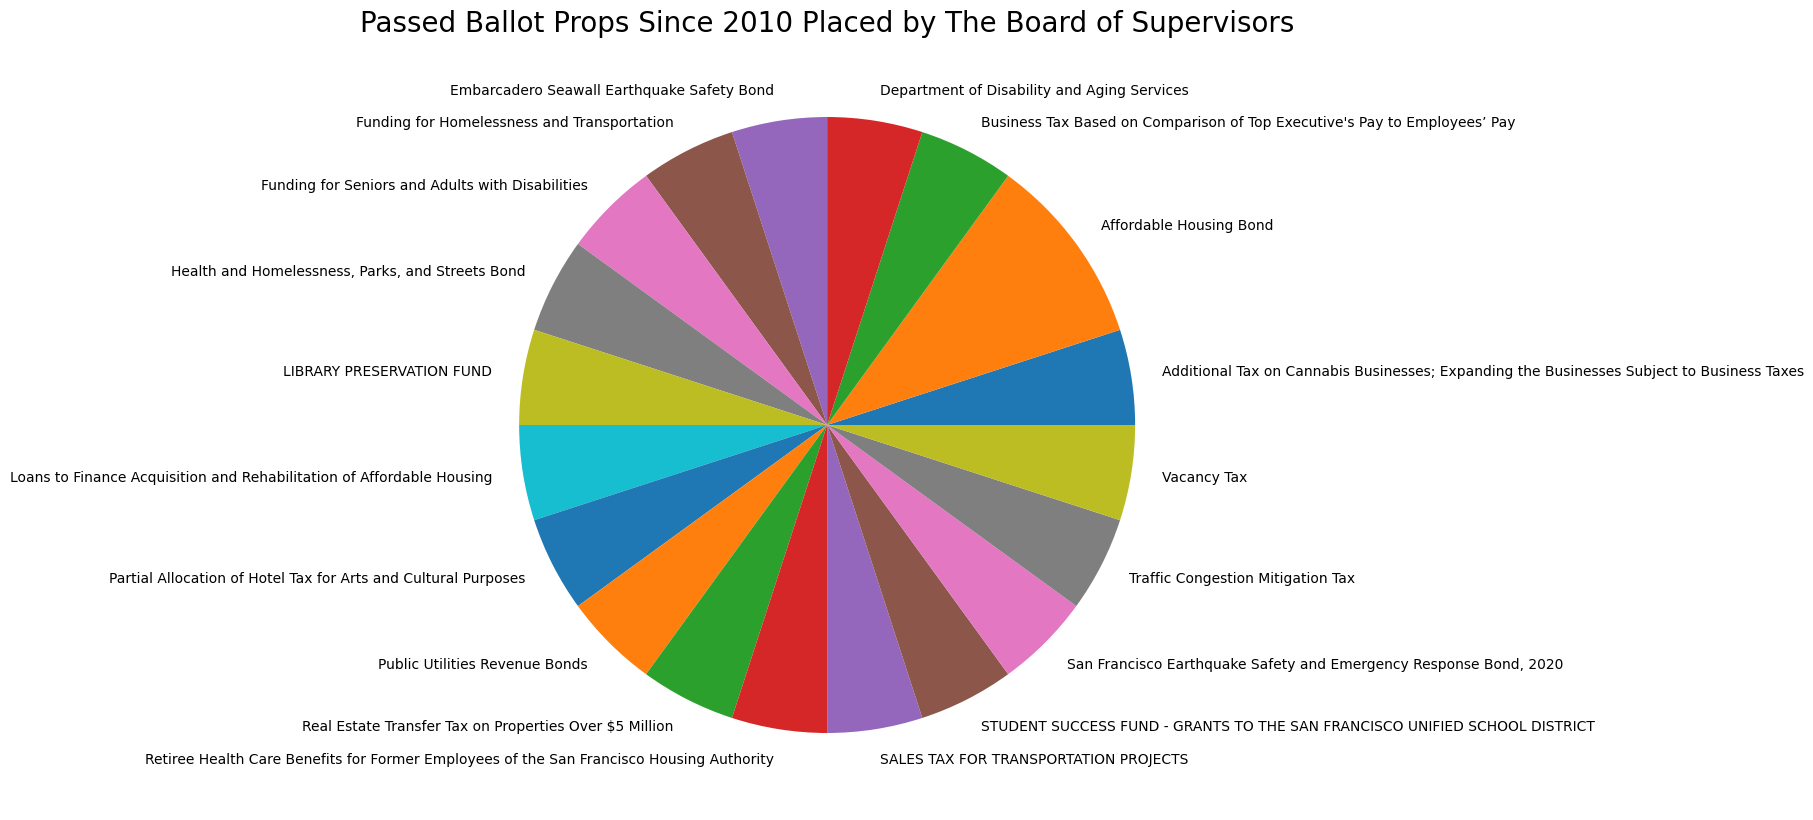

In [ ]:
#@title --
df[(df['PassFail']=='P') & (df['By_full']=='The Board of Supervisors')].groupby('Subject').Subject.count().plot.pie(ylabel='', figsize=(18, 10))
plt.title('Passed Ballot Props Since 2010 Placed by The Board of Supervisors', fontsize=20)

Text(0.5, 1.0, 'Ballot Prop  Type & Method Since 2010 by Pass vs Fail')

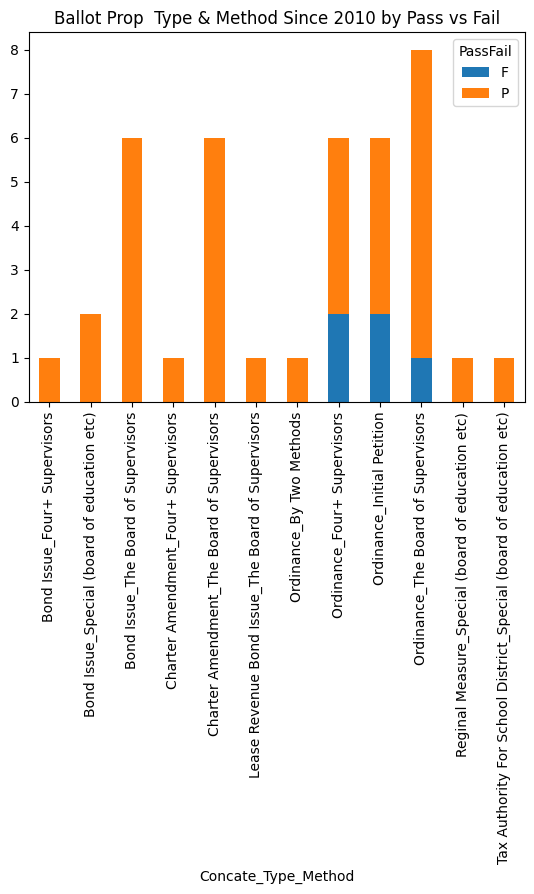

In [ ]:
#@title --
df['Concate_Type_Method']=df.TypeMeas_full+'_' + df.By_full
df.groupby(['Concate_Type_Method', 'PassFail']).Subject.count().unstack().plot(kind='bar', stacked =True)
plt.title('Ballot Prop  Type & Method Since 2010 by Pass vs Fail')

<ipython-input-93-0683f6cb9fea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['PassFail']=='P')].groupby('Concate_Subject')['No', 'Yes'].mean().sort_values(by='Yes').plot(kind='bar', figsize=(18, 10))


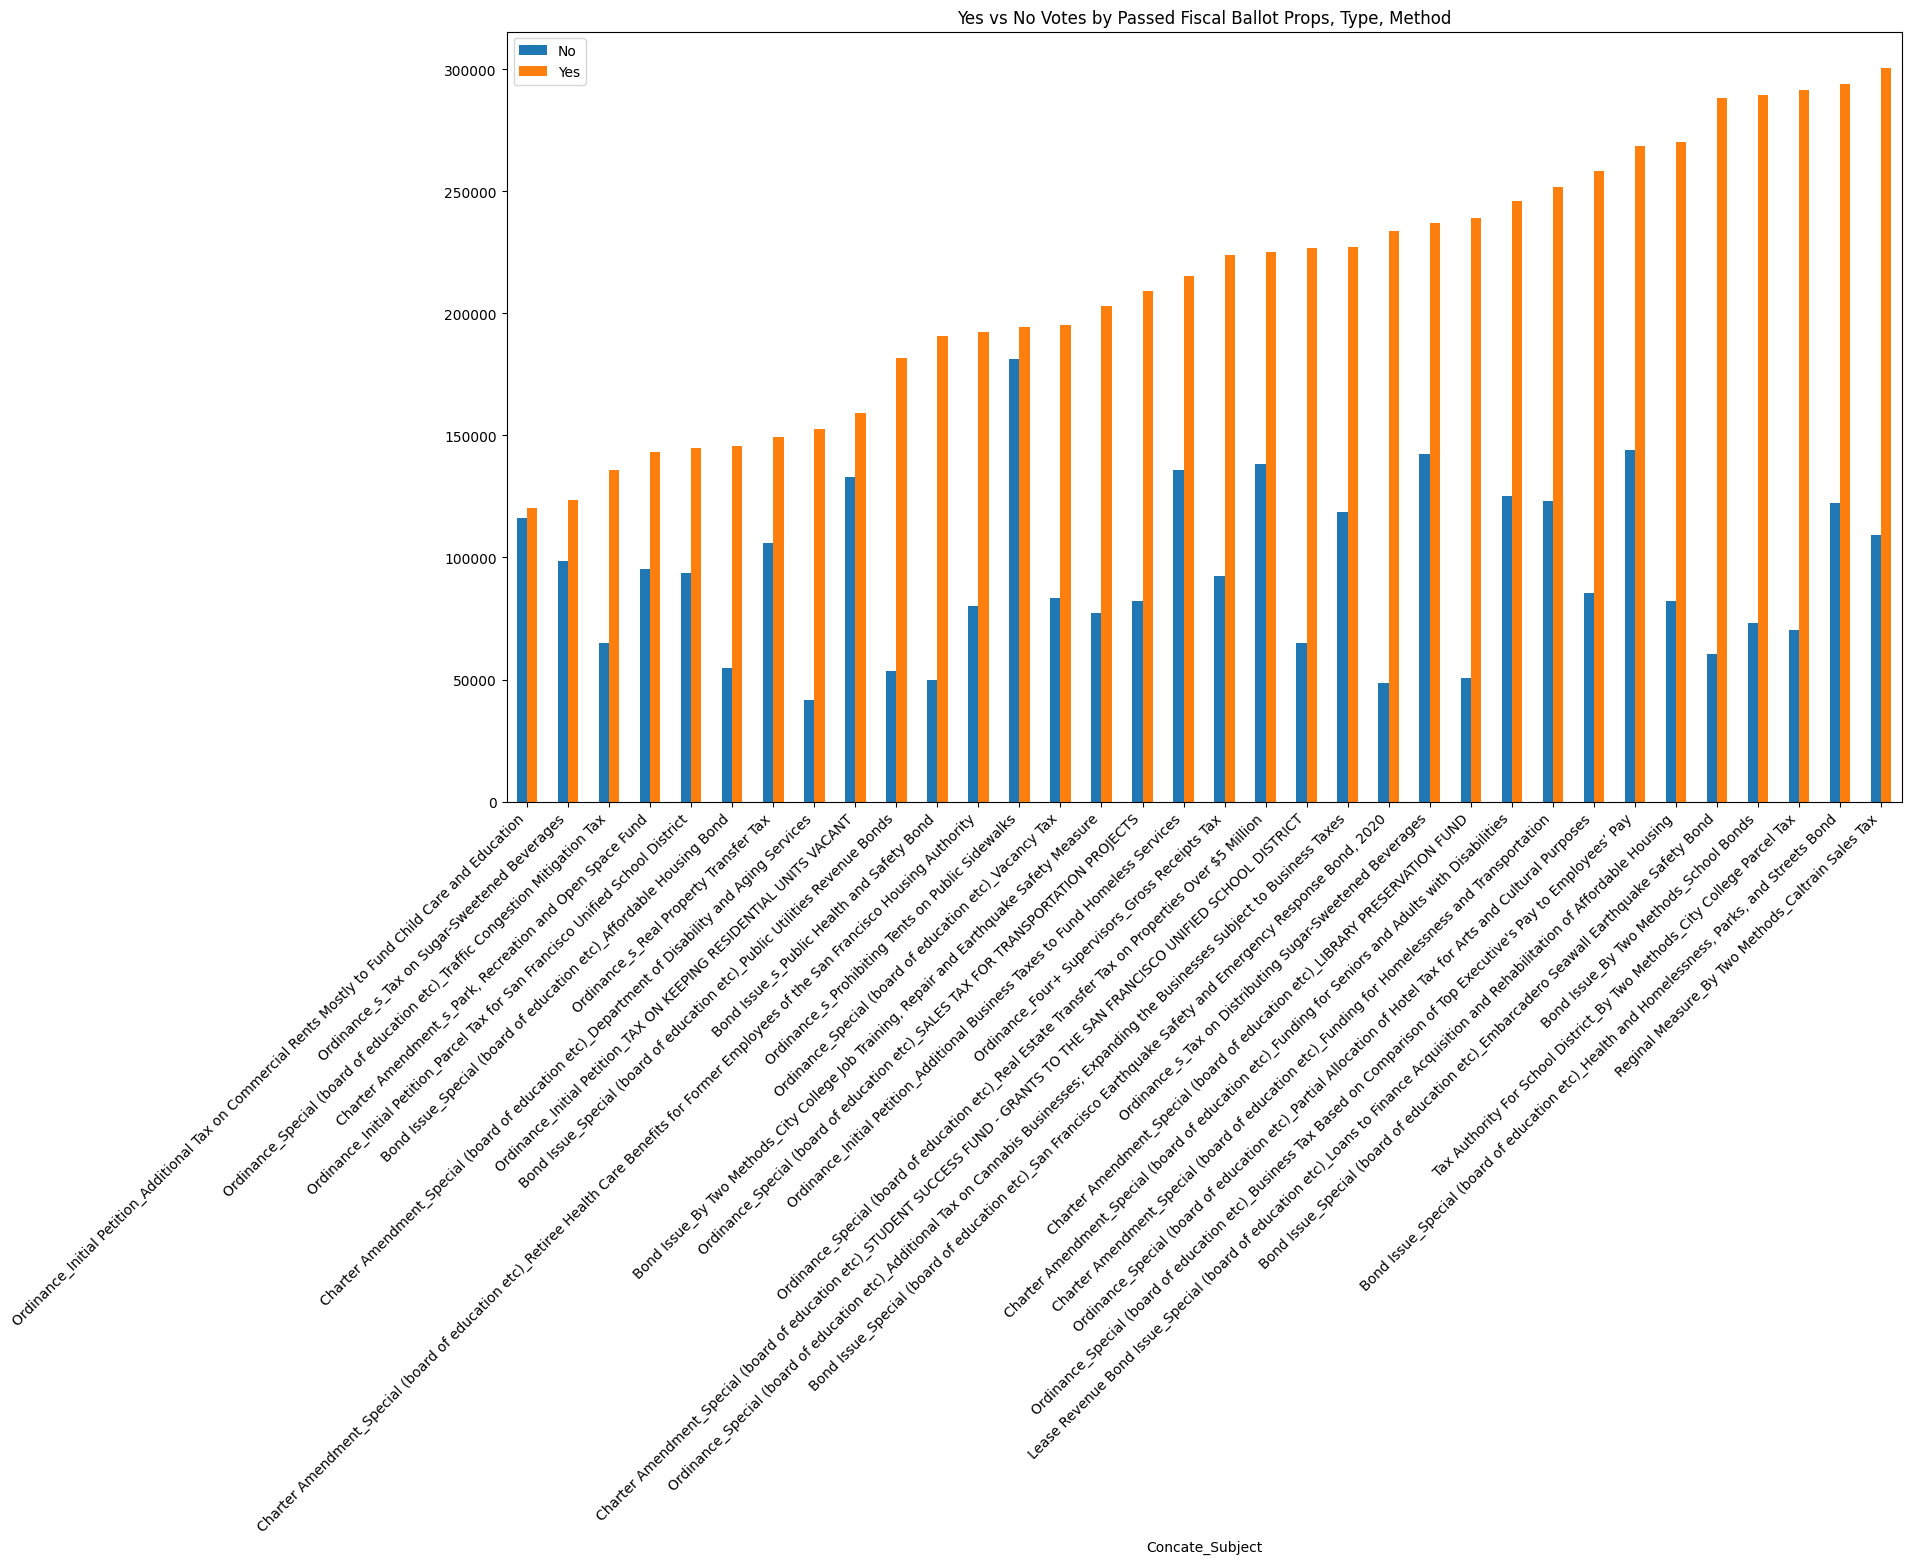

In [ ]:
#@title --
df['Concate_Subject']=df.TypeMeas_full+'_' + df.By_full + '_' + df.Subject

df[(df['PassFail']=='P')].groupby('Concate_Subject')['No', 'Yes'].mean().sort_values(by='Yes').plot(kind='bar', figsize=(18, 10))
plt.title('Yes vs No Votes by Passed Fiscal Ballot Props & Type & Method')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()